## Gán giá trị trung bình/trung vị

Gán là hành động thay thế dữ liệu bị khuyết bằng các ước tính thống kê về các giá trị bị khuyết. Mục tiêu của bất kỳ kỹ thuật gán nào là tạo ra một **tập dữ liệu hoàn chỉnh** có thể sử dụng để huấn luyện các mô hình học máy.

Gán mean/median gồm việc thay thế tất cả các lần xuất hiện giá trị bị khuyết (NA) trong một biến bằng giá trị trung bình (nếu biến có phân phối Gauss) hoặc trung vị (nếu biến có phân phối lệch).

**Lưu ý**:

- Nếu biến được phân phối chuẩn thì mean và median sẽ xấp xỉ như nhau. Do đó, việc thay thế các giá trị bị khuyết bằng mean và median cũng tương tự nhau. Thay thế dữ liệu bị khuyết bằng mode không phổ biến với các biến dạng số.
- Nếu biến bị lệch thì mean sẽ bị sai lệch bởi các giá trị ở đầu xa của phân phối. Do đó, median là đại diện tốt hơn cho phần lớn các giá trị trong biến.
- Với các biến rời rạc được ép kiểu thành 'int' (để tiết kiệm bộ nhớ), mean có thể không phải là số nguyên nên toàn bộ biến sẽ được ép kiểu lại thành 'float'. Để tránh hành vi này, chúng ta có thể thay thế NA bằng median. Median chắc chắn cũng sẽ là một số nguyên/giá trị rời rạc.


### Những biến nào có thể gán với mean/median?

Mean và median chỉ có thể được tính toán trên các biến dạng số, do đó các phương pháp này chỉ phù hợp với các biến số liên tục và rời rạc.



### Giả định

- Dữ liệu bị khuyết hoàn toàn ngẫu nhiên (MCAR).
- Các quan sát bị khuyết rất có thể trông giống như phần lớn các quan sát trong biến (chẳng hạn mean/median).

Nếu dữ liệu bị khuyết hoàn toàn ngẫu nhiên thì có thể giả định rằng các giá trị bị khuyết rất gần với giá trị của mean/median của phân phối, vì các giá trị này đại diện cho quan sát thường xuất hiện nhất/quan sát trung bình.


### Ưu điểm

- Dễ thực hiện.
- Cách nhanh chóng để có được tập dữ liệu hoàn chỉnh.
- Có thể tích hợp trong sản xuất (trong quá trình triển khai mô hình).

### Giới hạn

- Làm biến dạng phân phối biến ban đầu.
- Làm biến dạng phương sai ban đầu.
- Làm biến dạng hiệp phương sai với các biến còn lại của tập dữ liệu.

Khi thay NA bằng mean hoặc median, phương sai của biến sẽ bị sai lệch nếu số NA lớn hơn tổng số quan sát dẫn đến đánh giá thấp phương sai.


Ngoài ra, các ước lượng về hiệp phương sai và mối tương quan với các biến khác trong tập dữ liệu cũng có thể bị ảnh hưởng. Gán mean/median có thể thay đổi các tương quan nội tại vì mean/median thay thế dữ liệu bị khuyết sẽ không nhất thiết bảo toàn mối quan hệ với các biến còn lại.

Cuối cùng, việc tập trung tất cả các giá trị bị khuyết ở mean/median có thể dẫn đến các quan sát thường xuất hiện trong phân phối, được chọn làm các outlier.
 

### Khi nào thì sử dụng gán mean/median?

- Dữ liệu bị khuyết hoàn toàn ngẫu nhiên.
- Không quá 5% biến chứa dữ liệu bị khuyết.

Mặc dù trên lý thuyết, cần đáp ứng các điều kiện trên để giảm thiểu tác động của kỹ thuật gán này, nhưng trong thực tế, gán mean/median rất thường được sử dụng, ngay cả trong các trường hợp dữ liệu không phải là MCAR và khuyết rất nhiều giá trị. Lý do là vì tính đơn giản của kỹ thuật.


### Lưu ý cuối cùng

Việc thay thế NA bằng mean/median được sử dụng rộng rãi trong cộng đồng khoa học dữ liệu và các cuộc thi khoa học dữ liệu khác nhau. Hãy xem ví dụ giải pháp chiến thắng của KDD 2009 Cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Thông thường, gán mean/median được thực hiện cùng với việc thêm một biến "chỉ số khuyết dữ liệu" nhị phân để nắm bắt các quan sát khi dữ liệu bị khuyết (xem bài giảng "Chỉ số khuyết dữ liệu"), gồm 2 góc độ: nếu dữ liệu bị khuyết hoàn toàn ngẫu nhiên, điều này sẽ được ghi lại bởi  gán mean/median, nếu không, điều này sẽ được ghi lại bởi biến "chỉ số khuyết dữ liệu" bổ sung. Cả hai phương pháp đều rất dễ thực hiện và là lựa chọn hàng đầu trong các cuộc thi khoa học dữ liệu.

## Trong bản mô phỏng này:

Chúng ta sẽ học cách thực hiện kỹ thuật gán mean/median sử dụng pandas trên tập dữ liệu Ames House Price và Titanic.


In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# chia các tập dữ liệu
from sklearn.model_selection import train_test_split

## Titanic

In [71]:
# load tập dữ liệu với một số biến để trình bày

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [72]:
# xem phần trăm của NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

Biến duy nhất có dữ liệu bị khuyết là Age với ~20% quan sát bị thiếu.

### Gán quan trọng

Việc gán phải được thực hiện trong tập huấn luyện, sau đó được truyền sang tập kiểm tra. Điều này có nghĩa là mean/median được sử dụng để điền vào các giá trị bị khuyết ở cả tập huấn luyện và tập kiểm tra, chỉ nên được trích xuất từ tập huấn luyện để tránh overfitting. 

In [73]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # các yếu tố dự báo
    data['survived'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [74]:
# Hãy khám phá dữ liệu bị khuyết trong tập huấn luyện
# các phần trăm nên tương tự như
# của toàn bộ tập dữ liệu

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [76]:
## Yêu cầu 1: tạo một hàm điền các giá trị bị khuyết với mean/median:
# các biến nhận dataframe, biến và giá trị của
# mean/median
# và trả về biến với na đã điền


def impute_na(df, variable, mean_median):
    if mean_median == 'mean':
        mean = df[variable].mean()
        df[variable].fillna(mean,inplace=True)
    elif mean_median == 'median':
        median = df[variable].median()
        df[variable].fillna(median,inplace=True)
    else:
        # Trả về None nếu mean_median không hợp lệ
        return None
    
    # Điền các giá trị bị khuyết bằng giá trị mean hoặc median

    return df

<details><summary> Gợi ý </summary>

[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

</details>

In [77]:
# tính median của Age

median = X_train.age.median()
median

28.0

In [78]:
# tính mean của Age

mean = X_train.age.mean()
mean

30.23144399460189

In [79]:
## Yêu cầu 2: tạo một biến mới với các giá trị bị khuyết đã thay thế
# sử dụng hàm đã tạo phía trên

# trước tiên thay với median
## VIẾT CODE Ở ĐÂY:
X_train['Age_median'] = X_train['age']
impute_na(X_train, 'Age_median', 'median')

# giờ thay với mean
## VIẾT CODE Ở ĐÂY:
X_train['Age_mean'] = X_train['age']
impute_na(X_train, 'Age_mean', 'mean')

# mean chứa nhiều số thập phân, làm tròn tới chữ số thứ nhất
# sử dụng hàm round từ numpy
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)

X_train.head(15)

,age,fare,Age_median,Age_mean
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,28.0,30.2
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,28.0,30.2
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


Hãy xem các hàng có dữ liệu bị khuyết (NaN) trong Age và thấy cách các biến mới đó được thay thế với 27 (median) hoặc 30 (mean) như thế nào.

In [80]:
## Yêu cầu 3: chúng ta thấy phương sai thay đổi sau khi gán mean/median
# điều này được dự tính vì phần trăm dữ liệu bị khuyết khá
# cao ở Age, ~20%

## VIẾT CODE Ở ĐÂY:
print('Original variable variance: ', X_train["age"].var())
## VIẾT CODE Ở ĐÂY:
print('Variance after median imputation: ', X_train["Age_median"].var())
## VIẾT CODE Ở ĐÂY:
print('Variance after mean imputation: ', X_train["Age_mean"].var())

Original variable variance:  194.16304666581863
Variance after median imputation:  157.79842957602128
Variance after mean imputation:  157.0217073519937


<details><summary> Gợi ý </summary>

[var()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)

</details>

Như dự kiến, phương sai bị ước tính thấp do nhiều giá trị như nhau ==> giá trị mean/median

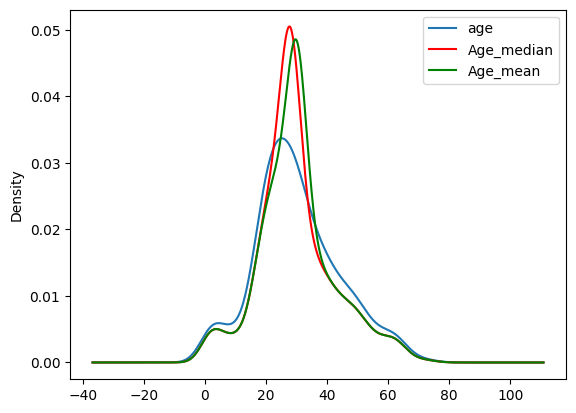

In [81]:
# chúng ta thấy các phân phối đã thay đổi
# với nhiều giá trị tích lũy về median
# hoặc mean

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
X_train['age'].plot(kind='kde', ax=ax)

# biến được gán với median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# biến được gán với mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Như đã đề cập ở trên, gán mean/median làm sai lệch phân phối ban đầu của biến Age. Biến đã biến đổi hiển thị nhiều giá trị hơn xung quanh mean/median.

**Điều này quan trọng không?**


Còn tùy thuộc vào mô hình học máy mà chúng ta muốn xây dựng. Mô hình tuyến tính giả định rằng các biến được phân phối chuẩn. Việc gán mean/median có thể làm sai lệch phân phối chuẩn ban đầu nếu % dữ liệu bị khuyết cao. Do đó, biến được gán cuối cùng sẽ không được phân phối chuẩn nữa, do đó có thể ảnh hưởng đến chất lượng của mô hình tuyến tính. 

In [82]:
## Yêu cầu 4: chúng ta cũng nói rằng gán mean/median có thể ảnh hưởng tới mối quan hệ
# với các biến khác trong tập dữ liệu, hãy quan sát 

## VIẾT CODE Ở ĐÂY
cols = ['fare', 'age', 'Age_median', 'Age_mean']
X_train[cols].cov()

,fare,age,Age_median,Age_mean
fare,2248.326729,136.176223,114.961682,110.198311
age,136.176223,194.163047,194.163047,194.159033
Age_median,114.961682,194.163047,157.798430,157.035694
Age_mean,110.198311,194.159033,157.035694,157.021707


<details><summary> Gợi ý </summary>

[cov()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html)

</details>

Chúng ta thấy hiệp phương sai giữa Age và Fare cũng thay đổi sau khi gán mean/median.

{'whiskers': [<matplotlib.lines.Line2D at 0x1de0ae685e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de0ae68a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de0ae68340>,
 'medians': [<matplotlib.lines.Line2D at 0x1de0ae68f40>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de0ae76220>,
 'means': []}

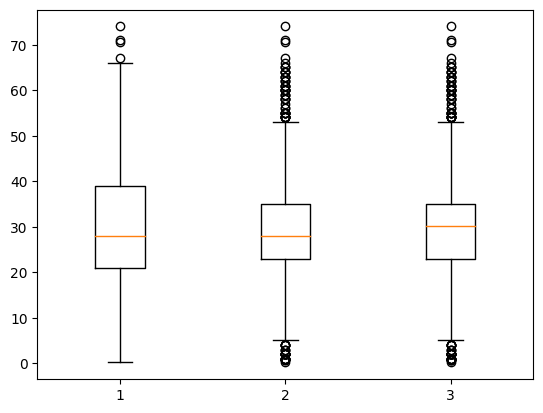

In [108]:
## Yêu cầu 5: Cuối cùng, gán mean/median có thể dẫn tới
# các quan sát bình thường trông giống outlier

# nói cách khác, gán mean/median có thể dẫn tới tăng
# số lượng outlier rõ ràng

# Hãy tìm hiểu điều này sử dụng biểu đồ hộp
## VIẾT CODE Ở ĐÂY
plt.boxplot([X_train['age'].dropna(),X_train['Age_median'],X_train['Age_mean']])

<details><summary> Gợi ý </summary>

[boxplot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

</details>

Từ biểu đồ trên, có thể thấy rằng sau khi gán không chỉ có nhiều outlier hơn với các giá trị Age cao hơn mà cả các outlier với các giá trị Age thấp hơn.

**Điều này quan trọng không?**

Nếu theo đuổi các outlier thực thì cần ghi nhớ động thái này để đảm bảo không tạo ra các outlier giả với kỹ thuật gán. Trên thực tế, chúng ta thường không kiểm tra động thái này, quan trọng là biết điều gì đang xảy ra.

## Tập dữ liệu giá nhà

Tập dữ liệu này có các biến có nhiều hoặc ít dữ liệu bị khuyết. Do đó, chúng ta có thể so sánh ảnh hưởng của gán mean/median trong cả hai trường hợp. 

In [109]:
# chúng ta sẽ chỉ sử dụng các biến sau,
# 3 trong số đó chứa NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [110]:
# load tập dữ liệu giá nhà

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [111]:
# in ra các biến chứa dữ liệu bị khuyết

# trong list tiếp theo, lặp qua tất cả các cột có trong list
# của tập dữ liệu và lựa chọn các cột chứa dữ liệu bị khuyết

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [112]:
# tìm phần trăm dữ liệu bị khuyết trong các biến
# code tương tự như đã học ở phần đặc điểm của biến

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

**Nhớ rằng mean và median chúng ta sẽ sử dụng để thay thế NA cần được tính trong tập huấn luyện và truyền vào tập kiểm tra.**

In [113]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

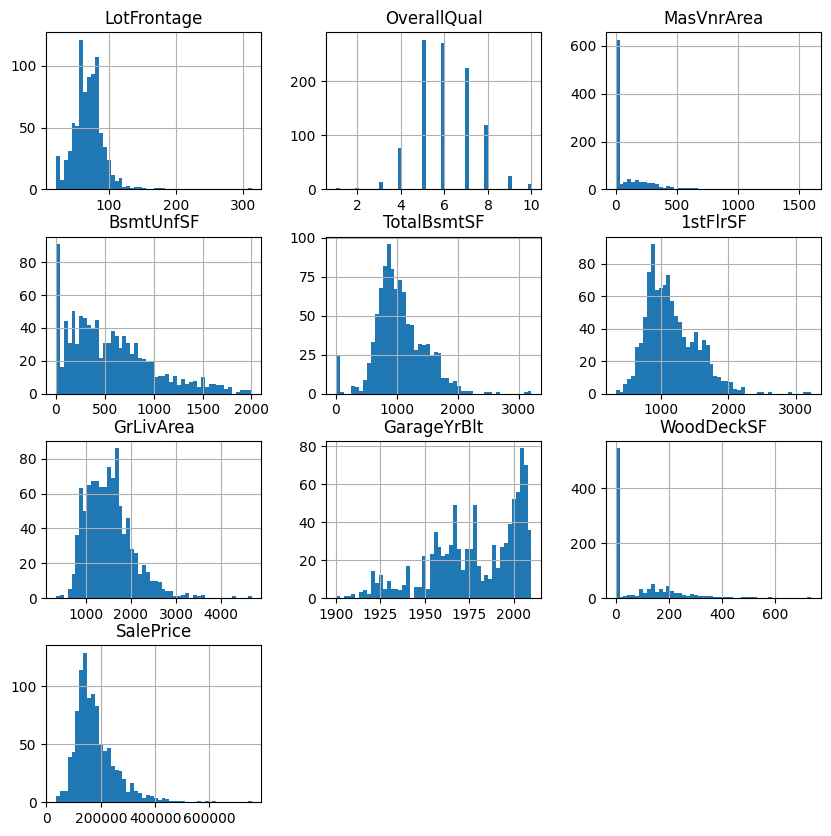

In [114]:
# vẽ biểu đồ phân bố của các biến
# chúng ta đã học code này ở phần các đặc điểm của biến

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [115]:
## Yêu cầu 6:
# tạo một biến mới với các giá trị bị khuyết được thay
# bằng median dùng hàm đã tạo phía trên

# lặp lại các dòng sau cho từng biến với NA
# ở các cell tiếp theo

cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

for col in cols:
  ## VIẾT CODE Ở ĐÂY
    X_train[ col + '_median'] = X_train[col]
    impute_na(X_train, col + '_median','median')
    X_test[ col + '_median'] = X_train[col]
    impute_na(X_test, col + '_median','median')

C:\Users\V\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\V\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\V\AppData\Roaming\Python\Python39\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [116]:
print(X_train)

      LotFrontage  OverallQual  MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
64            NaN            7       573.0        318         1057      1057   
682           NaN            6         0.0        288         1291      1291   
960          50.0            5         0.0        162          858       858   
1384         60.0            6         0.0        356          560       698   
1100         60.0            2         0.0          0          290       438   
...           ...          ...         ...        ...          ...       ...   
763          82.0            8       673.0         89         1252      1268   
835          60.0            4         0.0        625         1067      1067   
1216         68.0            6         0.0          0            0      1318   
559           NaN            7        18.0       1374         1374      1557   
684          58.0            7        30.0       1195         1195      1195   

      GrLivArea  GarageYrBlt  WoodDeckS

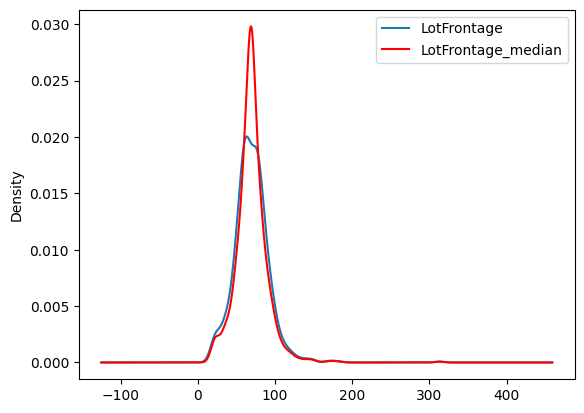

In [27]:
## Yêu cầu 9: đánh giá tác động của gán median với phân phối

# có thể thấy phân phối cho LotFrontAge đã thay đổi
# với nhiều giá trị hơn tích lũy hướng tới median

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
## VIẾT CODE Ở ĐÂY:
X_train['LotFrontage'].plot(kind='kde', ax = ax)

# biến được gán với median
## VIẾT CODE Ở ĐÂY:
X_train['LotFrontage' + '_median'].plot(kind='kde',ax = ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<details><summary> Gợi ý </summary>

[plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

</details>

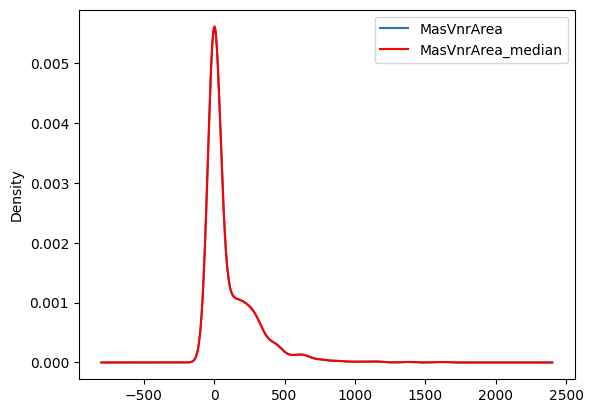

In [117]:
## Yêu cầu 10: Với MasVnrArea, do phần trăm dữ liệu bị khuyết 
# thấp, chúng ta không dự tính và không thấy thay đổi đáng kể trong
# phân phối ban đầu của biến

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
## VIẾT CODE Ở ĐÂY:
X_train['MasVnrArea'].plot(kind='kde', ax = ax)

# biến được gán với median
## VIẾT CODE Ở ĐÂY:
X_train['MasVnrArea' + '_median'].plot(kind='kde',ax = ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

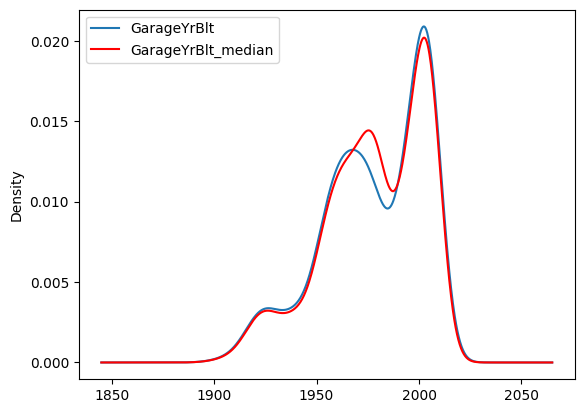

In [118]:
## Yêu cầu 11: tương tự với GarageBlt, do phần trăm dữ liệu bị khuyết 
# thấp, chúng ta không dự tính thay đổi nhiều trong
# phân phối ban đầu của biến, tuy nhiên lại thấy nhiều giá trị
# ở quanh median
fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
## VIẾT CODE Ở ĐÂY:
X_train['GarageYrBlt'].plot(kind='kde', ax = ax)

# biến được gán với median
## VIẾT CODE Ở ĐÂY:
X_train['GarageYrBlt' + '_median'].plot(kind='kde',ax = ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [119]:
## Yêu cầu 12: tương tự, chúng ta có thể khám phá tác động của kỹ thuật gán tới
# phương sai

# thấy phương sai thay đổi sau khi gán LotFrontAge, MasnVnrArea and GarageBlt
# điều này đã được dự kiến, do phần trăm dữ liệu bị khuyết khá
# cao, ~20%
cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in cols:
  ## VIẾT CODE Ở ĐÂY:
  print('Original Variance: ', X_train[col].var())
  print('Variance after median imputation: ', X_train[col + "_median"].var())

Original Variance:  532.5872021885677
Variance after median imputation:  434.0660426541647
Original Variance:  32983.53871003956
Variance after median imputation:  32874.27007404199
Original Variance:  624.3059475074142
Variance after median imputation:  591.3356883144761


In [120]:
## Yêu cầu 15: cuối cùng, hãy khám phá hiệp phương sai
# dành chút thời gian so sánh các giá trị trong bảng dưới đây
# xem hiệp phương sai cho LotFrontAge bị ảnh hưởng thế nào nhưng không
# nhiều với 2 biến khác

## VIẾT CODE Ở ĐÂY:
X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.744233e+02,28.095264
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,5.384774,1.005330e+02,16.875386
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,553.921303,3.298354e+04,1134.380889
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,788.095358,7.472110e+03,1724.141544
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2370.929189,2.465436e+04,2989.473391
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2750.747094,2.080136e+04,1890.271636
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3189.685753,3.496714e+04,2576.345636
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,24.755173,1.182673e+03,624.305948
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,106.009105,3.212101e+03,627.624634
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,544838.836893,6.790442e+06,877485.418108


{'whiskers': [<matplotlib.lines.Line2D at 0x1de0cc11d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1de0cc21280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de0cc11a60>,
 'medians': [<matplotlib.lines.Line2D at 0x1de0cc217c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de0cb43250>,
 'means': []}

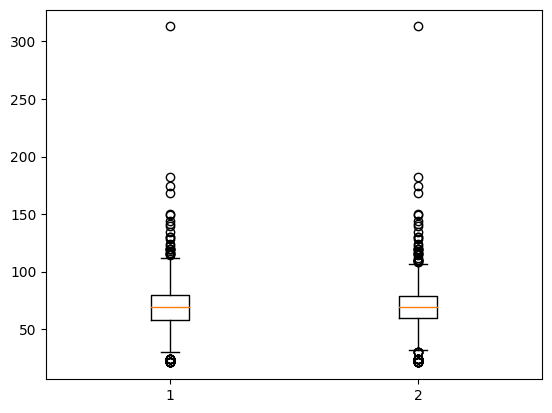

In [123]:
## Yêu cầu 16: khám phá phản ứng dây chuyền trên các outlier

# các giới hạn outlier cho LotFrontage giảm
# (xem chiều cao của whisker trên)
# nhưng tác động không rõ với với 2 biến khác

## VIẾT CODE Ở ĐÂY:
plt.boxplot([X_train['LotFrontage'].dropna(),X_train['LotFrontage_median']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de0b337a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1de0ad4d430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de0b337490>,
 'medians': [<matplotlib.lines.Line2D at 0x1de09bde820>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de0cbcef40>,
 'means': []}

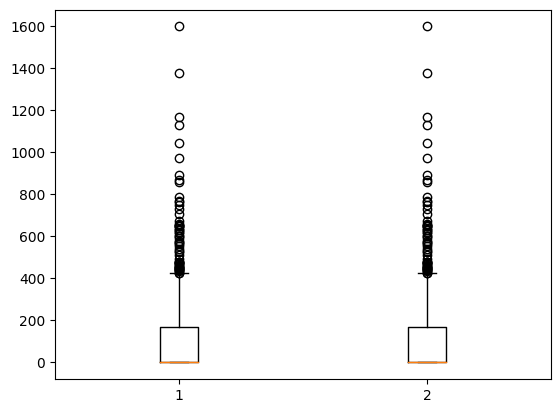

In [124]:
## Yêu cầu 17

## VIẾT CODE Ở ĐÂY:
plt.boxplot([X_train['MasVnrArea'].dropna(),X_train['MasVnrArea_median']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1de0cee0c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1de0c489820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de0cee0130>,
 'medians': [<matplotlib.lines.Line2D at 0x1de0c489340>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de0c489550>,
 'means': []}

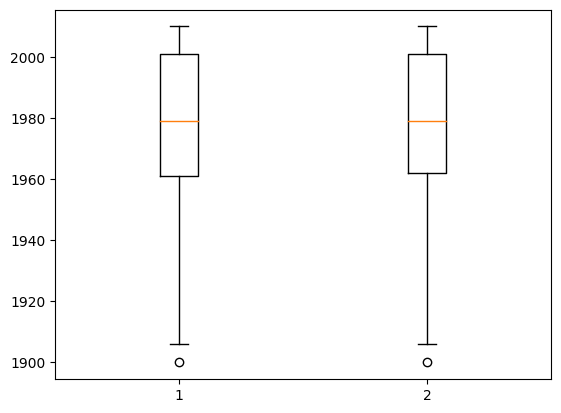

In [125]:
## Yêu cầu 18

## VIẾT CODE Ở ĐÂY:
plt.boxplot([X_train['GarageYrBlt'].dropna(),X_train['GarageYrBlt_median']])